## Q1

In [10]:
from math import sqrt

def is_prime(n):
    '''
    n: Int
    Returns True if n is prime
    '''
    if n == 1: #Trivial case
        return False
    if n == 2: #2 is a prime
        return True
    elif n%2 == 0: #if n is even, and not 2, it is composite
        return False
    else: #Implements the algorithm asked for
        for i in range(3,round(sqrt(n))+1,2):
            if n%i == 0:
                return False
    return True

### Testing Q1 is_prime function

In [11]:
print(is_prime(1))
print(is_prime(10))
print(is_prime(5))
print(is_prime(2))

False
False
True
True


## Q2

In [12]:
def gen_prime(a,b):
    '''
    a: int
    b: int
    Function returns a list of all the prime functions between a and b
    Depends on is_prime defined in cell 1
    NOTE: By between, we mean that the ends of the interval are excluded
    '''
    ret = []
    for i in range(a,b):
        if is_prime(i): #If i is prime, it gets added to returning list
            ret.append(i)
        else:
            pass
    return ret

### Testing Q2 gen_prime function

In [13]:
print(gen_prime(0,10))
print(gen_prime(1,10))
print(gen_prime(1,2))
print(gen_prime(10,20))

[2, 3, 5, 7]
[2, 3, 5, 7]
[]
[11, 13, 17, 19]


## Q3

In [14]:
def fact(n):
    '''
    n: int
    Returns n!
    Used in f
    '''
    #Simple, non-recursive factorial function
    ret = 1
    for i in range(2,n+1):
        ret *= i
    return ret

def f(x, n):
    '''
    x: float
    n: int
    Calculates exp(x) using the Taylor expansion upto nth term
    '''
    ret = 0
    for i in range(n+1):
        ret += pow(x,i)/fact(i) #Evaluates ith term of formula
    return ret

### Testing Q3 f function

In [15]:
print(f(1,100))
print(f(1,0))
print(f(0,0))

2.7182818284590455
1.0
1.0


## Q4

In [19]:
x = [i/10 for i in range(1,11)]
n = [i for i in range(4,21,4)]
for i in x:
    print(f"x = {i} | ", end="")
    for j in n:
        print("%.6f | " % f(i,j), end="")
    print("")

x = 0.1 | 1.105171 | 1.105171 | 1.105171 | 1.105171 | 1.105171 | 
x = 0.2 | 1.221400 | 1.221403 | 1.221403 | 1.221403 | 1.221403 | 
x = 0.3 | 1.349838 | 1.349859 | 1.349859 | 1.349859 | 1.349859 | 
x = 0.4 | 1.491733 | 1.491825 | 1.491825 | 1.491825 | 1.491825 | 
x = 0.5 | 1.648438 | 1.648721 | 1.648721 | 1.648721 | 1.648721 | 
x = 0.6 | 1.821400 | 1.822119 | 1.822119 | 1.822119 | 1.822119 | 
x = 0.7 | 2.012171 | 2.013753 | 2.013753 | 2.013753 | 2.013753 | 
x = 0.8 | 2.222400 | 2.225541 | 2.225541 | 2.225541 | 2.225541 | 
x = 0.9 | 2.453837 | 2.459602 | 2.459603 | 2.459603 | 2.459603 | 
x = 1.0 | 2.708333 | 2.718279 | 2.718282 | 2.718282 | 2.718282 | 


## Q5

In [30]:
def rec_contd_func(n,st):
    '''
    n: int
    stop: int
    Recursively computes the continued fraction given to find pi
    n is the current "slice" of the fraction being computed
    stop is the last level of computation of the continued fraction (base case)
    '''
    if n > st: #Base Case
        return 0
    else:
        return (pow(2*n - 1, 2))/(2 + rec_contd_func(n+1,st))

def cont_frac_pi(n):
    '''
    n: int
    Uses the continued fraction to compute pi, upto nth term
    Relies on rec_contd_func
    '''
    return 4/(1+rec_contd_func(1,n))

def leibniz(n):
    '''
    n: int
    Evaluates the Leibniz formula upto the nth term
    '''
    ret = 0
    for i in range(1,n+1):
        ret += pow(-1,i+1)*(1/(2*i - 1))
    return ret

def leibniz_pi(n):
    '''
    n: int
    Evaluates pi using the Leibniz formula
    Relies on leibniz
    '''
    return 4*(leibniz(n))

## Testing the values of pi
Using the functions that are defined above

In [32]:
print(cont_frac_pi(100))
print(leibniz_pi(100))

3.15149340107099
3.1315929035585537


### Second part of the Question 5
1. Printing formatted table
2. Plotting both as $\pi(n)$ vs. $n$

n = 1 | CF = 2.66666667 | L = 4.00000000
n = 2 | CF = 3.46666667 | L = 2.66666667
n = 3 | CF = 2.89523810 | L = 3.46666667
n = 4 | CF = 3.33968254 | L = 2.89523810
n = 5 | CF = 2.97604618 | L = 3.33968254
n = 6 | CF = 3.28373848 | L = 2.97604618
n = 7 | CF = 3.01707182 | L = 3.28373848
n = 8 | CF = 3.25236593 | L = 3.01707182
n = 9 | CF = 3.04183962 | L = 3.25236593
n = 10 | CF = 3.23231581 | L = 3.04183962


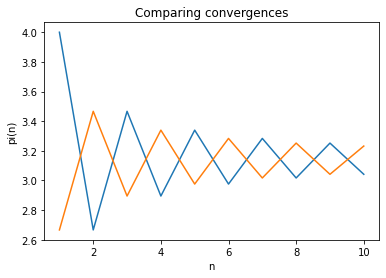

In [34]:
n = [i for i in range(1,11)]

for i in n:
    print(f"n = {i} | ", end="")
    print("CF = %.8f | " % cont_frac_pi(i), end="")
    print("L = %.8f" % leibniz_pi(i))
    
import matplotlib.pyplot as plt

l = [leibniz_pi(i) for i in n]
c = [cont_frac_pi(i) for i in n]

plt.plot(n, l, label="Leibniz formula")
plt.plot(n, c, label="Continued fraction")
plt.xlabel("n")
plt.ylabel("pi(n)")
plt.title("Comparing convergences")
plt.show()

Diptanuj Sarkar (22MS038)